Analizando los 500 tickers del S&P 500...
YF.download() has changed argument auto_adjust default to True


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFPricesMissingError('possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (period=6mo)')


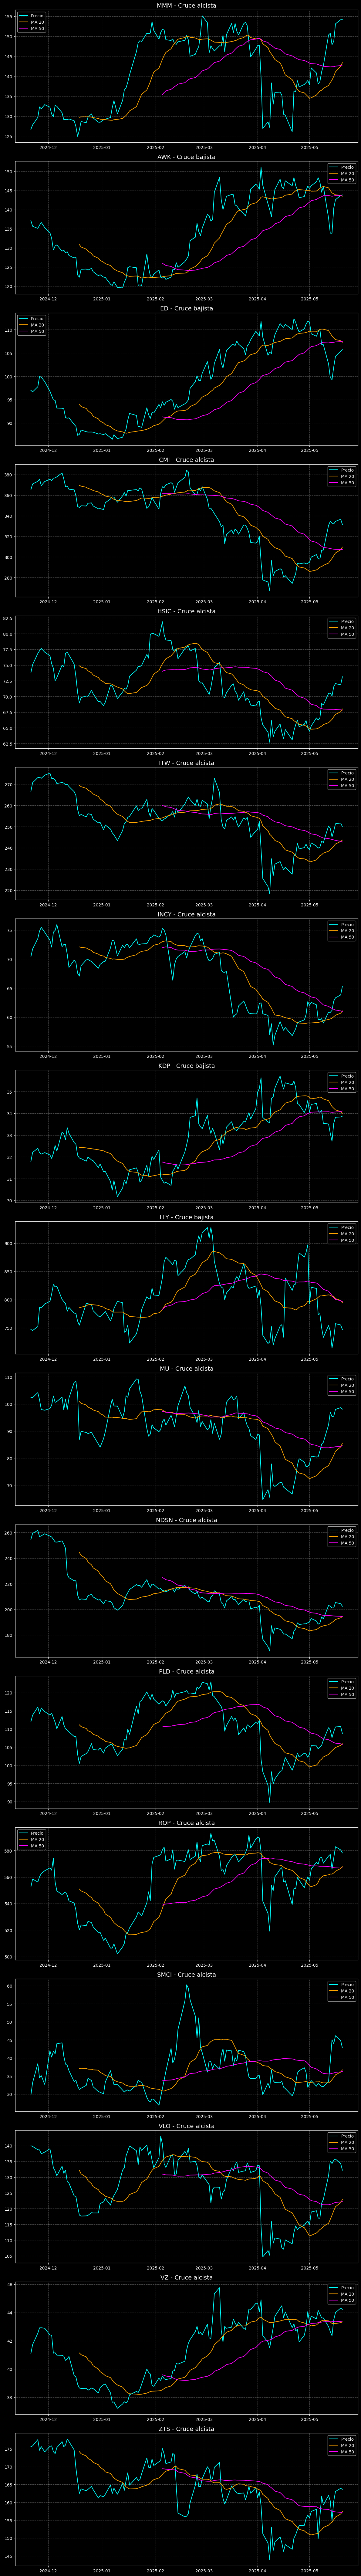

¡Encontramos 17 tickers con cruces!


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


style.use('dark_background')

# Obtenemos los tickers del S&P 500 (esto es un ejemplo, usa una fuente real)
# Por simplicidad, aquí va una lista corta; en tu curso enseñas cómo obtenerla completa
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Parámetros configurables (¡flexibilidad total!)
fast_ma_period = 20  # Media móvil rápida
slow_ma_period = 50  # Media móvil lenta
period = '6mo'       # Período de datos históricos

# Función para detectar cruces como un trader pro
def detect_crossover(data, fast_ma, slow_ma):
    if len(data) < 2:
        return None
    if data[fast_ma].iloc[-2] < data[slow_ma].iloc[-2] and data[fast_ma].iloc[-1] > data[slow_ma].iloc[-1]:
        return 'alcista'
    elif data[fast_ma].iloc[-2] > data[slow_ma].iloc[-2] and data[fast_ma].iloc[-1] < data[slow_ma].iloc[-1]:
        return 'bajista'
    return None

# Lista para los tickers con cruce
tickers_con_cruce = []

# Descargamos datos y analizamos como cracks
print("Analizando los 500 tickers del S&P 500...")
for ticker in sp500_tickers:
    try:
        data = yf.download(ticker, period=period, progress=False)
        if data.empty:
            continue
        data['Fast_MA'] = data['Close'].rolling(window=fast_ma_period).mean()
        data['Slow_MA'] = data['Close'].rolling(window=slow_ma_period).mean()
        crossover = detect_crossover(data, 'Fast_MA', 'Slow_MA')
        if crossover:
            tickers_con_cruce.append((ticker, crossover))
    except Exception as e:
        print(f"Error con {ticker}: {e}")

# Si no hay cruces, nos despedimos con estilo
if not tickers_con_cruce:
    print("No hay cruces hoy, ¡el mercado está tranquilo!")
else:
    num_tickers = len(tickers_con_cruce)
    fig, axes = plt.subplots(num_tickers, 1, figsize=(12, 5 * num_tickers))
    if num_tickers == 1:
        axes = [axes]  # Ajuste para un solo gráfico

    for i, (ticker, crossover) in enumerate(tickers_con_cruce):
        data = yf.download(ticker, period=period, progress=False)
        data['Fast_MA'] = data['Close'].rolling(window=fast_ma_period).mean()
        data['Slow_MA'] = data['Close'].rolling(window=slow_ma_period).mean()

        ax = axes[i]
        ax.plot(data['Close'], label='Precio', color='cyan')
        ax.plot(data['Fast_MA'], label=f'MA {fast_ma_period}', color='orange')
        ax.plot(data['Slow_MA'], label=f'MA {slow_ma_period}', color='magenta')
        ax.set_title(f'{ticker} - Cruce {crossover}', fontsize=14)
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()
    print(f"¡Encontramos {num_tickers} tickers con cruces!")

In [ ]:
sp500_tickers

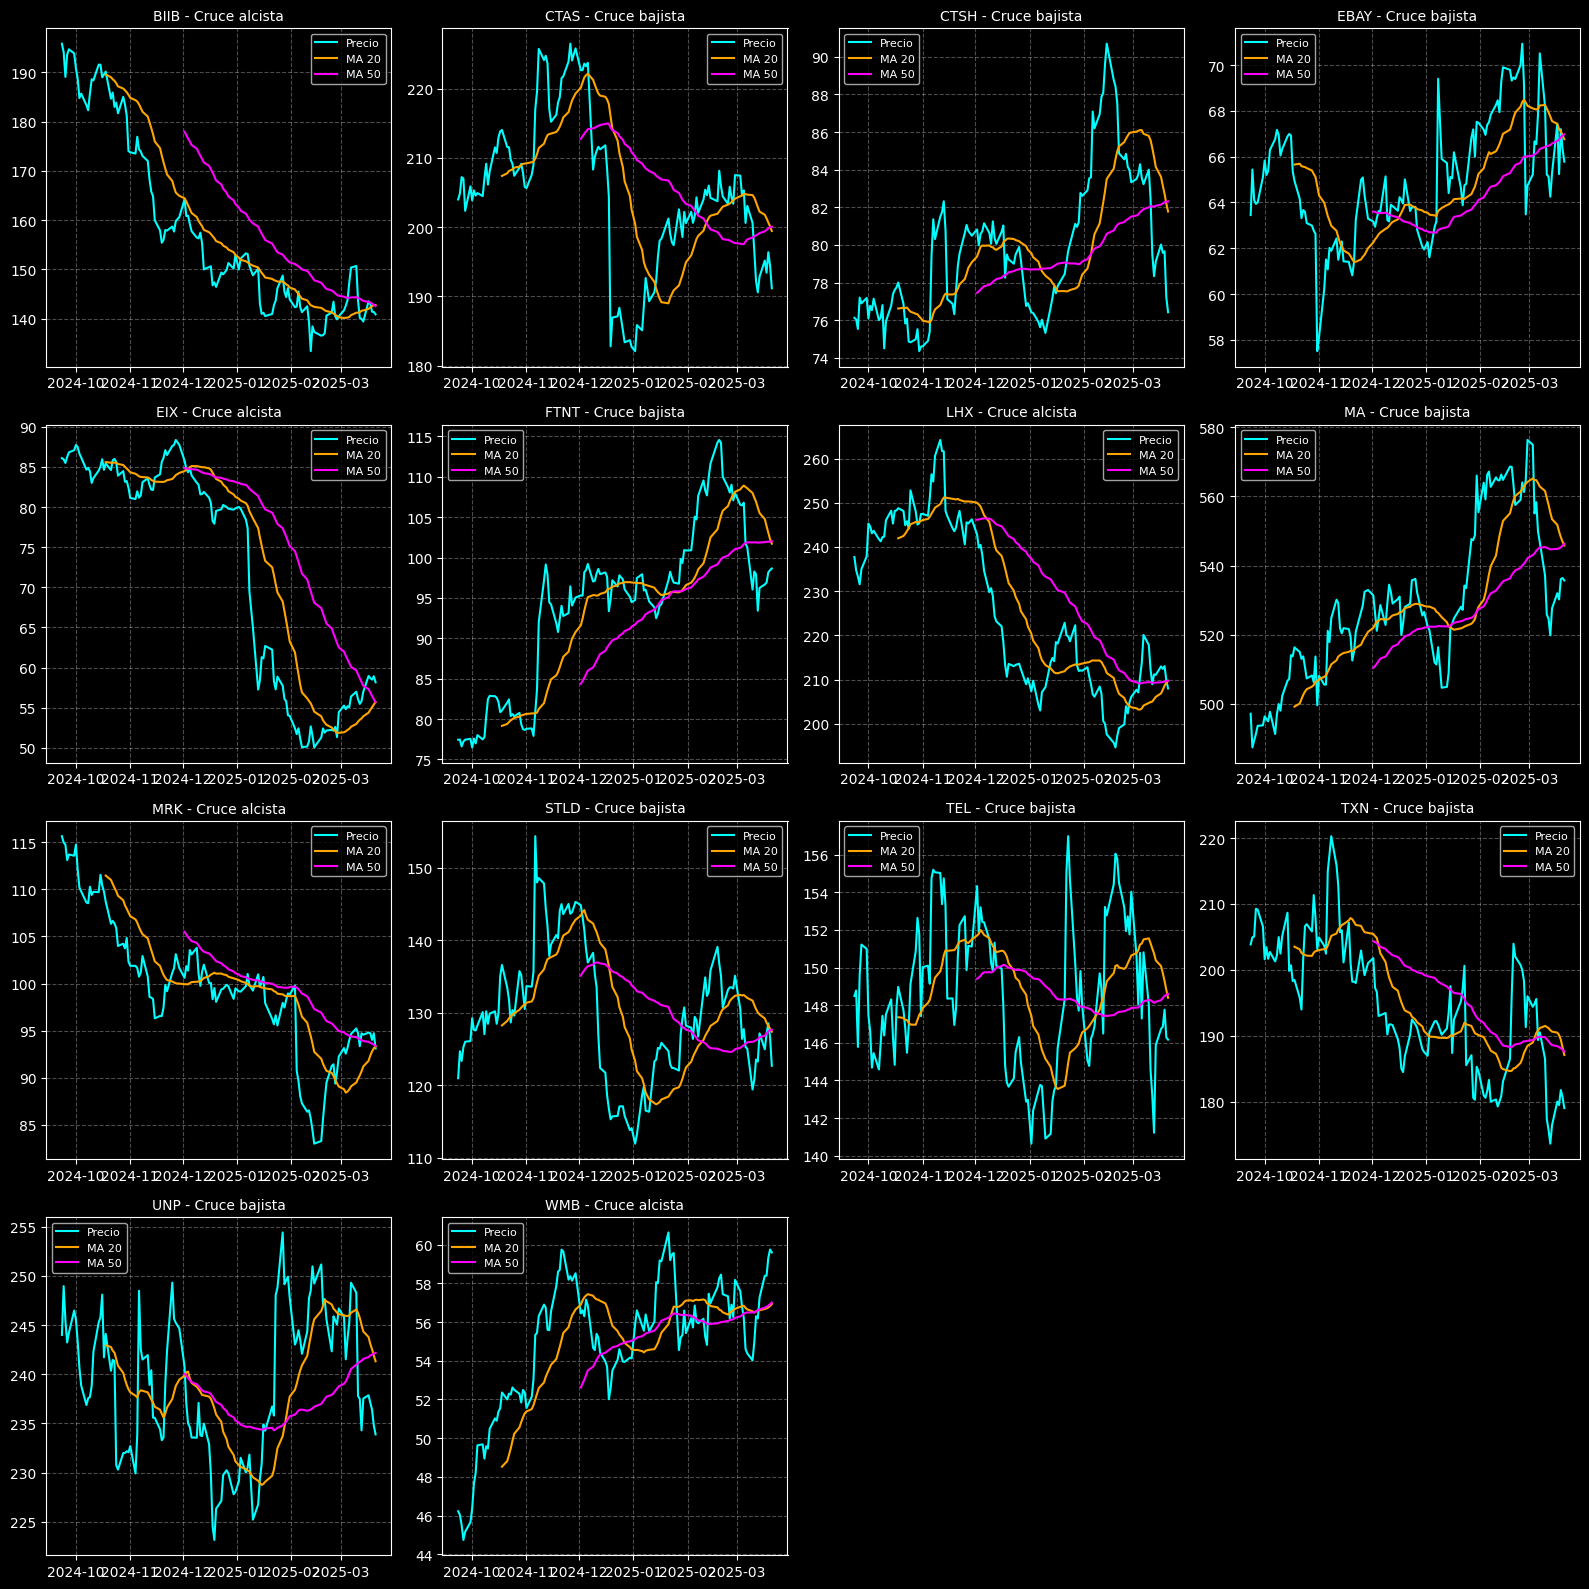

¡Encontramos 14 tickers con cruces!


In [ ]:
# Resultados
if not tickers_con_cruce:
    print("No hay cruces hoy, ¡el mercado está tranquilo!")
else:
    num_tickers = len(tickers_con_cruce)
    num_columnas = 4
    num_filas = (num_tickers + num_columnas - 1) // num_columnas  # Calcula el número de filas necesarias

    # Creamos la figura con 4 columnas y ajustamos el tamaño
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(16, 4 * num_filas))
    axes = axes.flatten()  # Aplanamos los ejes para facilitar el acceso

    for i, (ticker, crossover) in enumerate(tickers_con_cruce):
        data = yf.download(ticker, period=period, progress=False, auto_adjust=False)
        data['Fast_MA'] = data['Close'].rolling(window=fast_ma_period).mean()
        data['Slow_MA'] = data['Close'].rolling(window=slow_ma_period).mean()

        ax = axes[i]
        ax.plot(data['Close'], label='Precio', color='cyan')
        ax.plot(data['Fast_MA'], label=f'MA {fast_ma_period}', color='orange')
        ax.plot(data['Slow_MA'], label=f'MA {slow_ma_period}', color='magenta')
        ax.set_title(f'{ticker} - Cruce {crossover}', fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.3)

    # Ocultamos los ejes vacíos si los hay
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()  # Ajusta el espaciado entre subplots
    plt.show()
    print(f"¡Encontramos {num_tickers} tickers con cruces!")